In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import streamlit as st
%matplotlib inline  

/Users/mohid/Documents/Data Science/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /Users/mohid/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [4]:
df =pd.read_csv('/Users/mohid/Documents/Data Science/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
common_Ratings = df['rating'].value_counts().mod
common_Ratings

<bound method Series.mod of rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64>

# 🎬 Netflix Movies & TV Shows (Descriptive Analysis)

## 📊 Overview
- Total Movies and TV Shows

In [7]:
print(df['type'].unique() )
TV_shows = df[df['type'] == 'TV Show']
Movies = df[df['type'] == 'Movie']
print("Total TV Shows: ", len(TV_shows))
print("Total Movies: ", len(Movies))

['Movie' 'TV Show']
Total TV Shows:  2676
Total Movies:  6131


## 
- Average duration of movies

In [8]:
Movies['duration_minutes'] = Movies['duration'].str.extract('(\d+)').astype(float)
average_duration = Movies['duration_minutes'].mean()
print(f"Average Movie Duration: {average_duration:.2f} minutes")

Average Movie Duration: 99.58 minutes


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/1707949947.py:1: SyntaxWarning: invalid escape sequence '\d'
  Movies['duration_minutes'] = Movies['duration'].str.extract('(\d+)').astype(float)
/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/1707949947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movies['duration_minutes'] = Movies['duration'].str.extract('(\d+)').astype(float)


- Most common ratings

## 🔖 Rating Distribution by Country and Type

The following visualization shows how Netflix content ratings are distributed across the **top 4 countries** with the most titles: **United States, India, United Kingdom**, and **Canada**.

Each subplot corresponds to a country and displays rating counts split by **content type** (Movie vs TV Show). This helps compare how different regions categorize their content in terms of age appropriateness.

### Key Insights:
- **TV-MA** is the dominant rating in most countries, especially the United States.
- **India** shows a notable presence of both **TV-14** and **TV-MA**, with a clear majority being Movies.
- The **United Kingdom** and **Canada** show relatively balanced distributions between Movies and TV Shows.
- The range of ratings is broader in the **United States**, suggesting more diverse content for different audiences.

This analysis highlights regional differences in how Netflix content is rated and the type of content most common in each region.

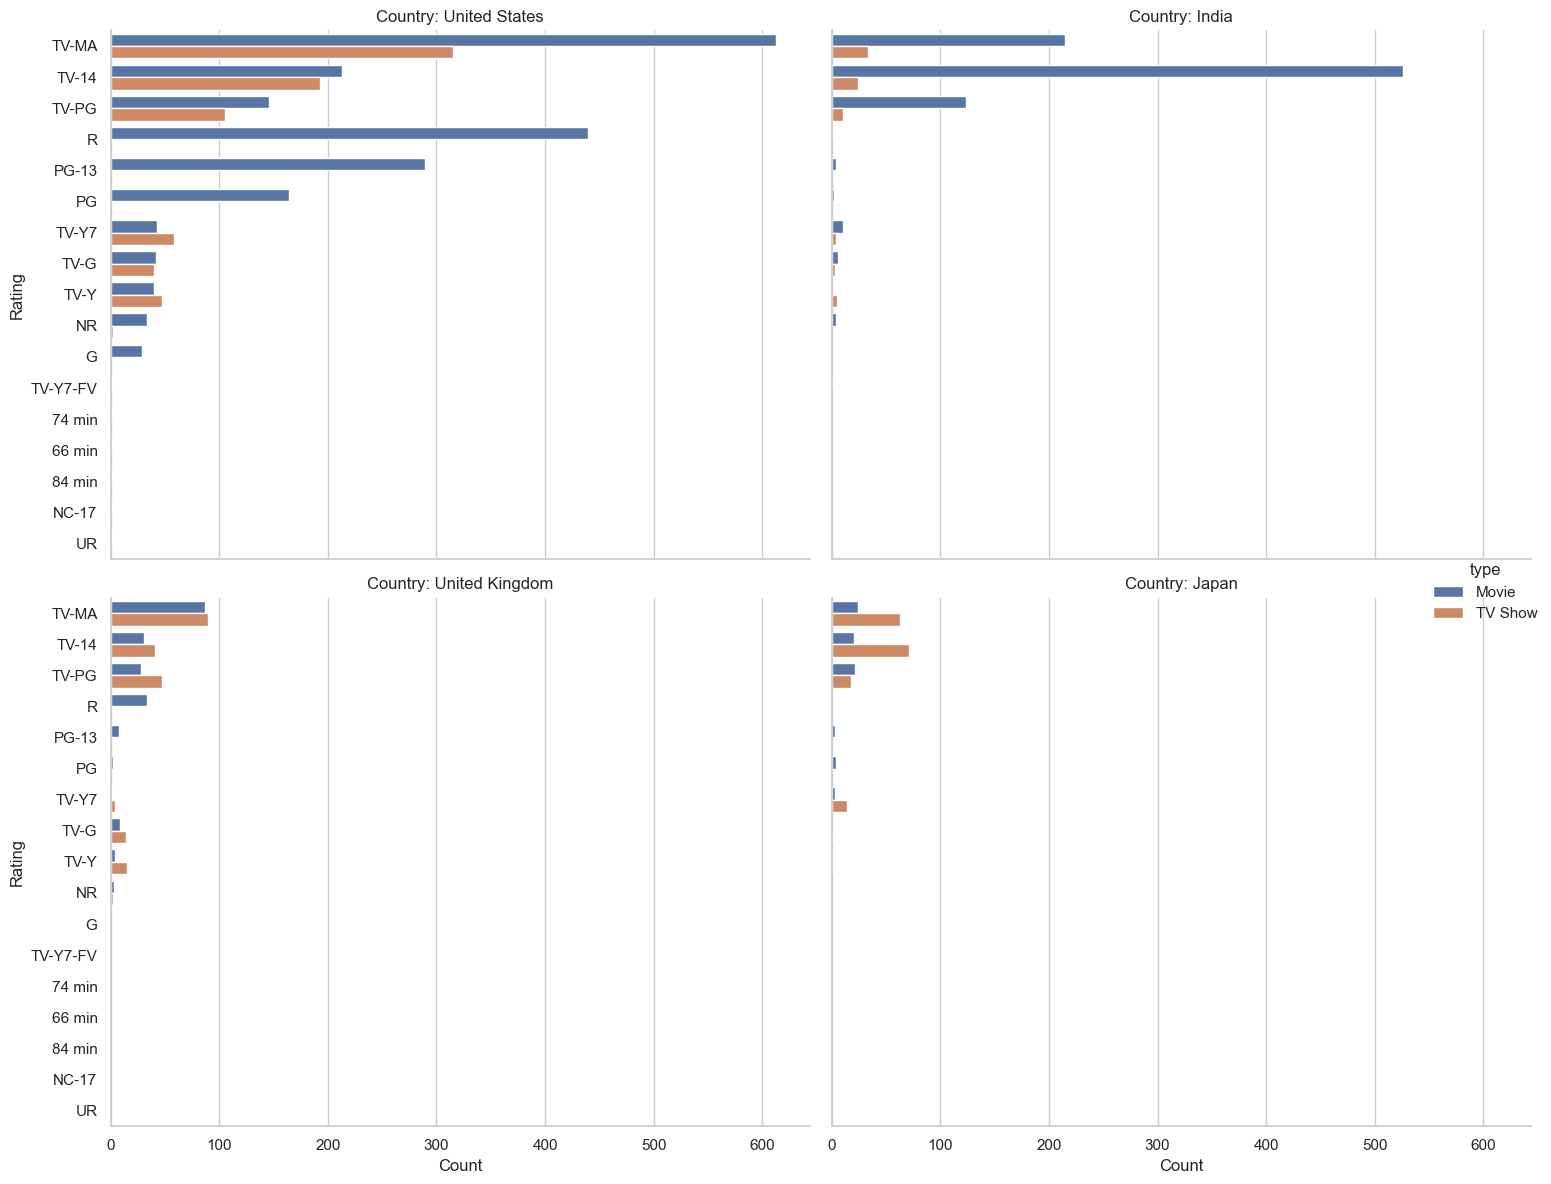

In [9]:
top_countries = df['country'].value_counts().head(4).index

subset = df[df['country'].isin(top_countries)]

order = subset['rating'].value_counts().index

sns.set(style="whitegrid")
g = sns.catplot(
    data=subset,
    kind="count",
    y="rating",
    order=order,
    hue="type",         
    col="country",      
    col_wrap=2,         
    height=6,
    aspect=1.2
)

g.set_titles("Country: {col_name}")
g.set_axis_labels("Count", "Rating")
plt.tight_layout()
plt.show()


## 🕒 Time-Based Analysis

Understanding how Netflix has added content over time helps uncover trends in platform strategy, seasonal preferences, and user engagement.


### 📈 1. Content Added Per Year
We visualized the total number of titles (Movies + TV Shows) added each year. This helps identify growth patterns and Netflix’s content expansion phases.  
**Insight:** Significant growth observed post-2015, with a content surge around 2018–2020.


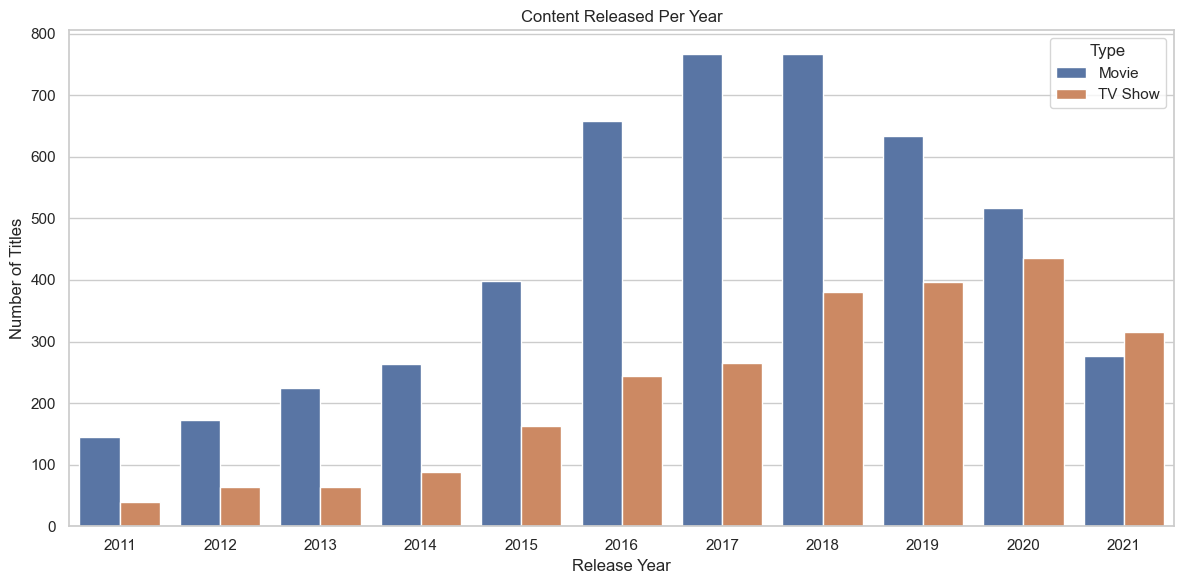

In [10]:
content_PerYear = df[['release_year', 'type', 'title']].groupby(['release_year', 'type']).count().reset_index().sort_values(by='release_year')
usefulData = content_PerYear.tail(22)
plt.figure(figsize=(12, 6))
sns.barplot(data=usefulData, x='release_year', y='title', hue='type')
plt.title('Content Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


### 🏆 2. Most Active Year for Content Addition
By identifying the year with the highest number of releases, we highlighted Netflix’s peak publishing year. 

In [11]:
MaxContentYear = df['release_year'].value_counts().idxmax()
year_data = df[df['release_year'] == MaxContentYear]

movie_count = year_data[year_data['type'] == 'Movie'].shape[0]
tv_count = year_data[year_data['type'] == 'TV Show'].shape[0]
total = movie_count + tv_count

print(f"The year with the most content is: {MaxContentYear} with {total} titles — including {movie_count} Movies and {tv_count} TV Shows.")

The year with the most content is: 2018 with 1147 titles — including 767 Movies and 380 TV Shows.


**Insight:** The year **`[Year]`** had the most titles added, indicating a major content push.


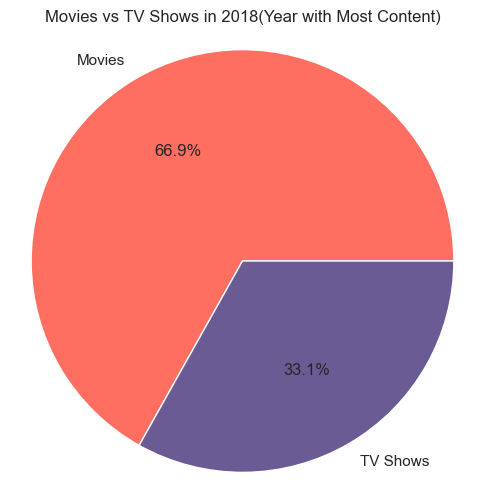

In [12]:
labels = ['Movies', 'TV Shows']
sizes = [movie_count, tv_count]
colors = ['#FF6F61', '#6B5B95']  

plt.figure(figsize=(6,6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  
    colors=colors, 
    wedgeprops={'edgecolor': 'white'}
)
plt.title(f"Movies vs TV Shows in {MaxContentYear}(Year with Most Content)")
plt.axis('equal') 
plt.show()


### 🎬 3. Movies vs TV Shows Over Time
Using a grouped line/bar chart, we tracked how Netflix’s focus shifted between Movies and TV Shows over the years. 

In [13]:
grouped = df.groupby(['release_year', 'type']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='release_year', columns='type', values='count').fillna(0).tail(22)

**Insight:** While Movies dominated in earlier years, TV Shows have been steadily rising in recent years — showing a strategic balance shift.


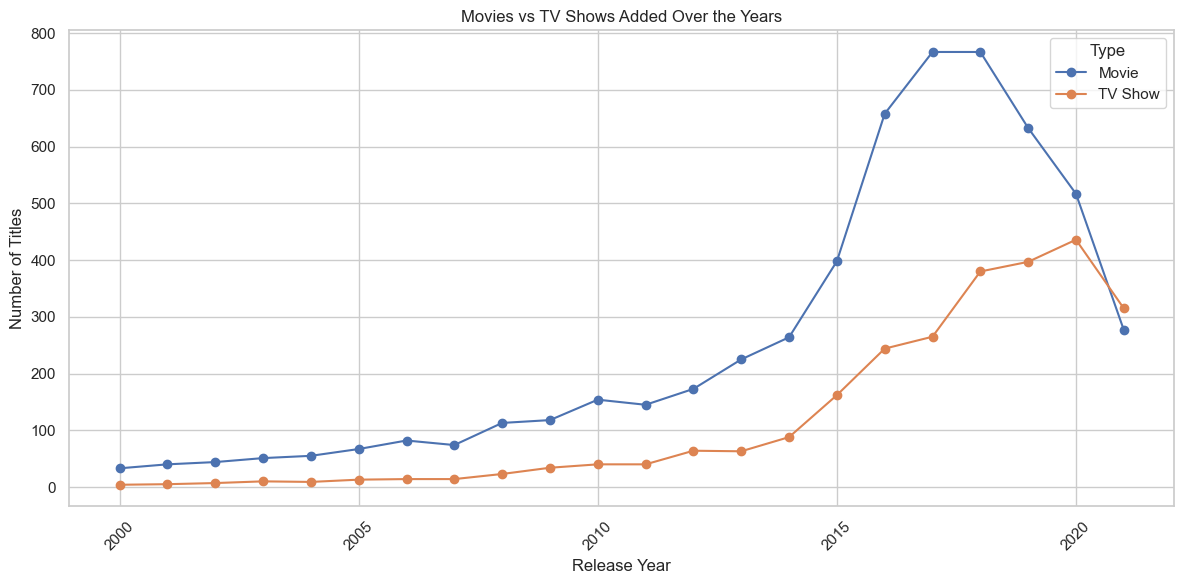

In [14]:
pivot_df.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📆 4. Month-wise Release Trend
We analyzed seasonal patterns by extracting the `month_added` from the `date_added` column.


- **Bar Chart:** Shows which months generally have the most content added.

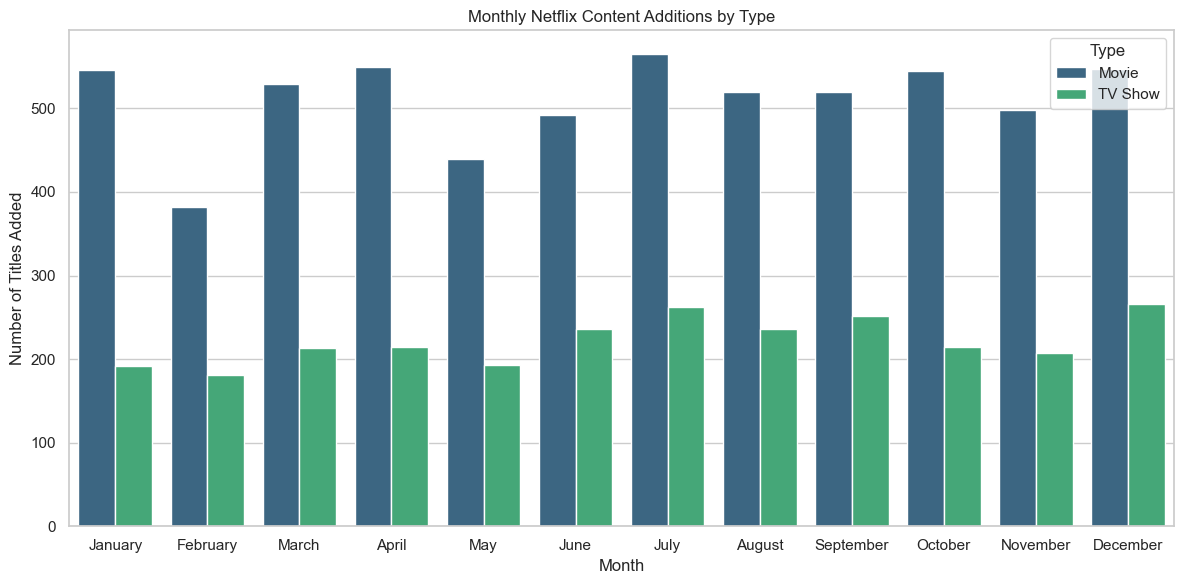

In [15]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month_name() 
df['year_added'] = df['date_added'].dt.year 

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='month_added',
    hue='type',
    order=month_order,
    palette='viridis'
)

plt.title("Monthly Netflix Content Additions by Type")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

- **Heatmap:** Reveals release volume trends across both **months** and **years**.

**Insight:** December and July tend to have spikes — possibly due to holidays and summer breaks. Some months consistently show lower release activity.


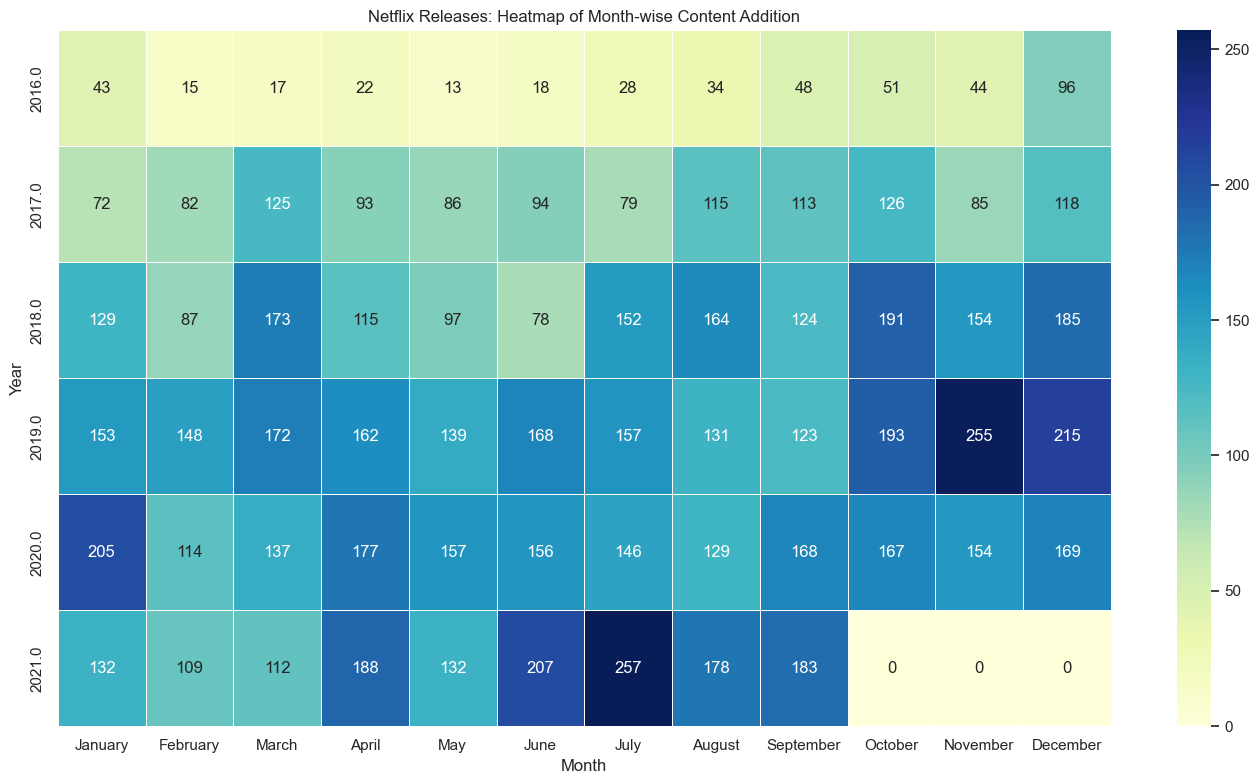

In [16]:
heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0).tail(6)

heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='d')
plt.title("Netflix Releases: Heatmap of Month-wise Content Addition")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


### ✅ Conclusion:
This time-based analysis highlights Netflix’s evolving content strategy. It shows not only how much content was added, but also when — providing valuable insights into release timing, seasonal marketing, and content planning.


## 🌍 Geographic & 👤 People-Centric Analysis

### 📌 Geographic Analysis

#### 📊 Top 10 Producing Countries
- Dropped rows with missing `country` or `type` values.
- Extracted the **first listed country** for consistency.
- Identified the **top 10 countries** with the most content.
- Grouped by `country` and `type` to see the distribution of **Movies vs TV Shows**.
- **Visualization:** A bar chart showing content count by country, separated by type using `hue`.

/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/1318691866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['country'] = df_country['country'].str.split(',').str[0]


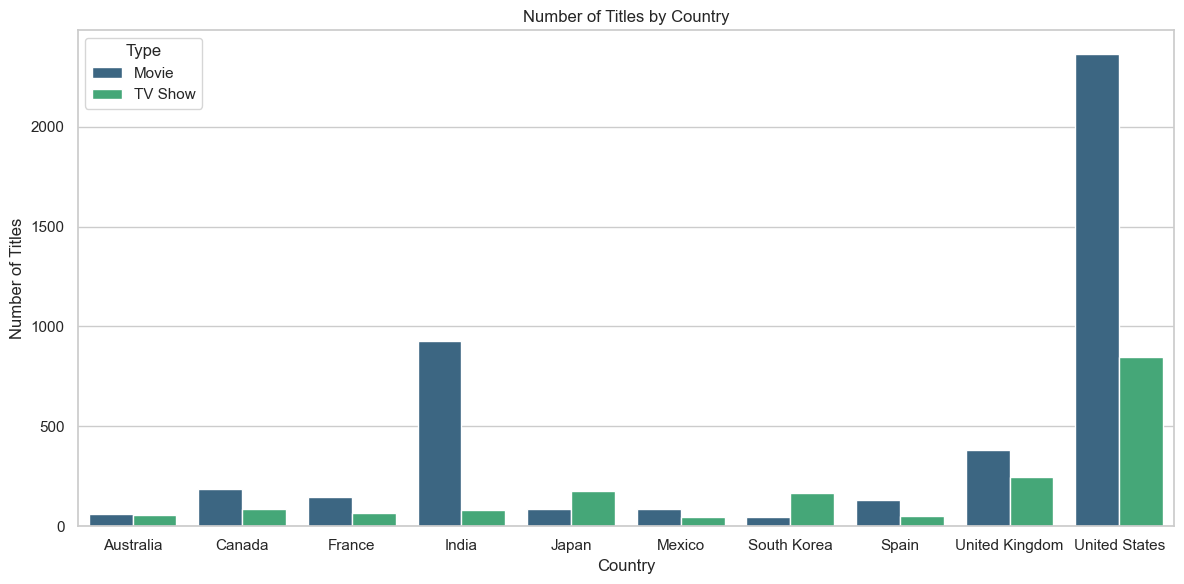

In [17]:
df_country = df.dropna(subset=['country', 'type'])
df_country['country'] = df_country['country'].str.split(',').str[0]
top_countries = df_country['country'].value_counts().head(10).index
df_country = df_country.groupby(['country', 'type']).size().reset_index(name='count')
df_country = df_country[df_country['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_country,
    x='country',
    y='count',
    hue='type',
    palette='viridis'
)
plt.title("Number of Titles by Country")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

#### 🌎 Most Popular Genres by Country
- Cleaned the `listed_in` column to extract the **primary genre**.
- Focused on the **top 10 genres** and **top 5 countries**.
- Grouped by genre and country to show regional preferences.
- **Visualization:** A heatmap to show which genres are most popular in each country.

/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/3854286807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['listed_in'] = df_genre['listed_in'].str.split(',').str[0]


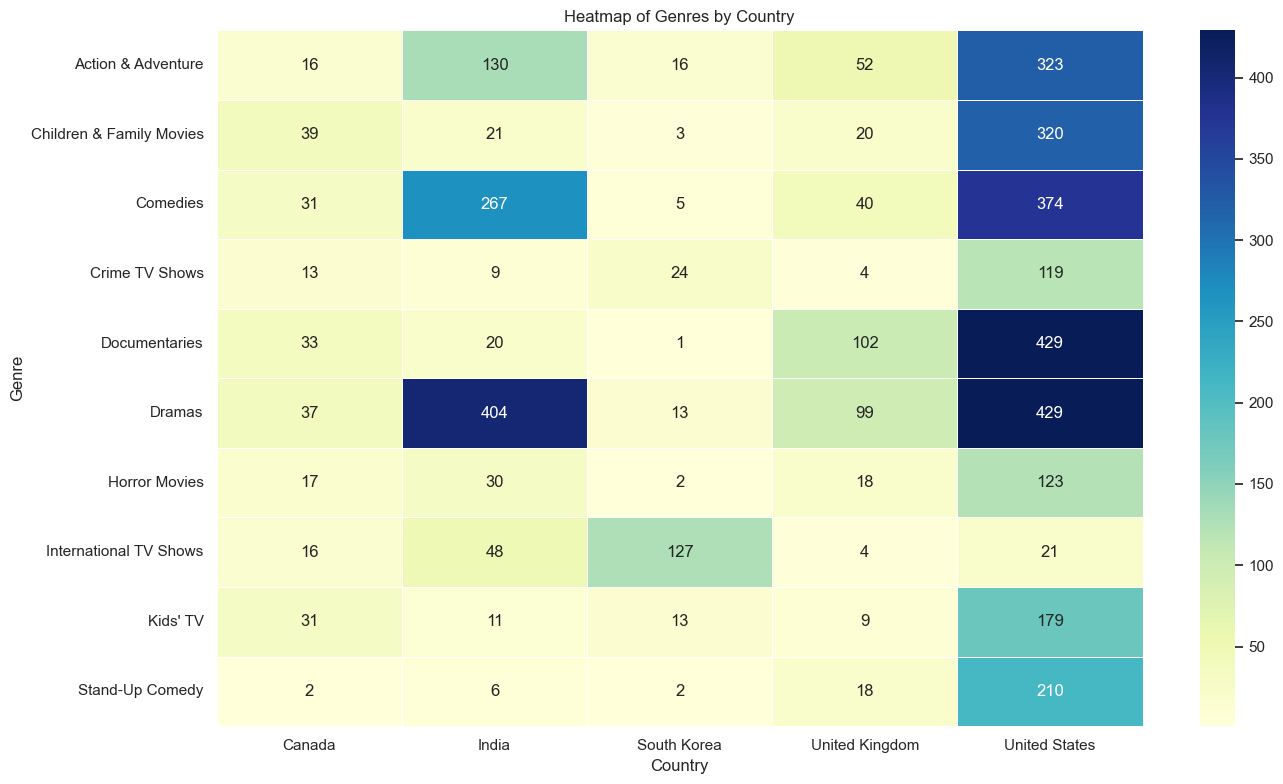

In [18]:
df_genre = df.dropna(subset=['listed_in','country'])
df_genre['listed_in'] = df_genre['listed_in'].str.split(',').str[0]
top_genres = df_genre['listed_in'].value_counts().head(10).index
df_genre = df_genre[df_genre['listed_in'].isin(top_genres)]
df_genre['country'] = df_genre['country'].str.split(',').str[0]
Top_countries = df_genre['country'].value_counts().head(5).index
df_genre = df_genre[df_genre['country'].isin(Top_countries)]
df_genre = df_genre.groupby(['listed_in', 'country']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.heatmap(
    df_genre.pivot(index='listed_in', columns='country', values='count'),
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    linewidths=0.5
)
plt.title("Heatmap of Genres by Country")
plt.xlabel("Country")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### 👤 People-Centric Analysis

#### 🎬 Top 10 Directors with Most Titles
- Extracted the first listed director.
- Identified the **top 10 directors** based on title count.
- Grouped by `director` and `type` to differentiate between Movies and TV Shows.
- **Visualization:** A bar chart showing content count for each top director by type.

/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/2079978701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast['cast'] = df_cast['cast'].str.split(',').str[0]


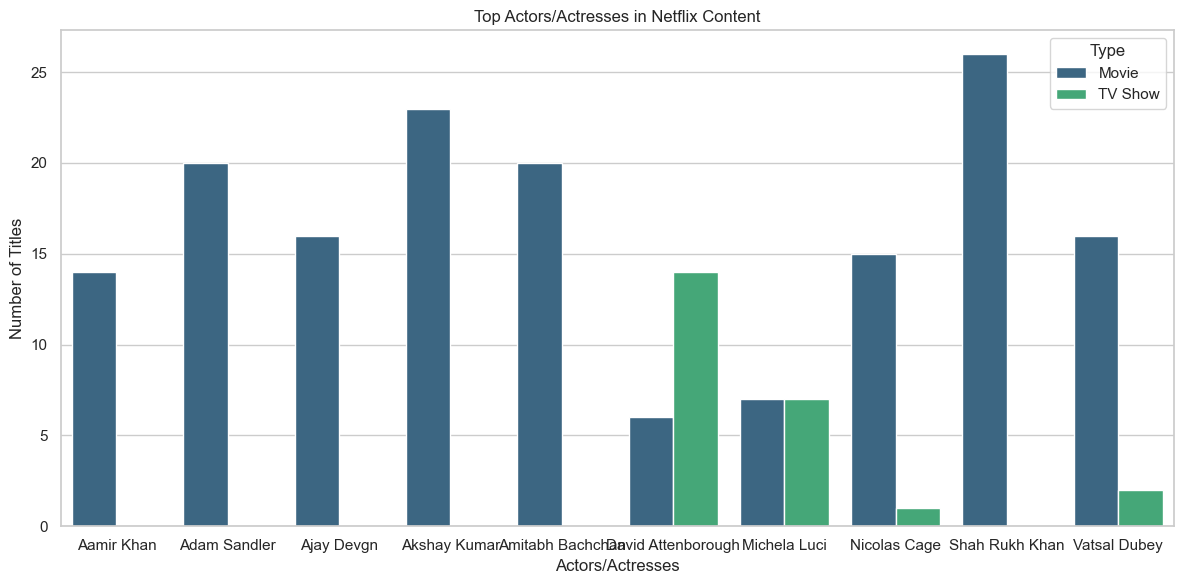

In [19]:
df_cast = df.dropna(subset=['cast'])
df_cast['cast'] = df_cast['cast'].str.split(',').str[0]
top_cast = df_cast['cast'].value_counts().head(10).index
df_cast = df_cast[df_cast['cast'].isin(top_cast)]
df_cast = df_cast.groupby(['cast', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_cast,
    x='cast',
    y='count',
    hue='type',
    palette='viridis'
)
plt.title("Top Actors/Actresses in Netflix Content")
plt.xlabel("Actors/Actresses")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

#### 🎭 Most Frequent Actors/Actresses
- Extracted the first actor/actress listed in the `cast` column.
- Identified the **top 10 most frequent actors** on Netflix.
- Grouped by actor and content type.
- **Visualization:** A bar chart highlighting the most featured actors and their involvement in Movies vs TV Shows.


/var/folders/54/s3hwjrbj3v70q48n9t89g9hc0000gn/T/ipykernel_1645/1765839173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_director['director'] = df_director['director'].str.split(',').str[0]


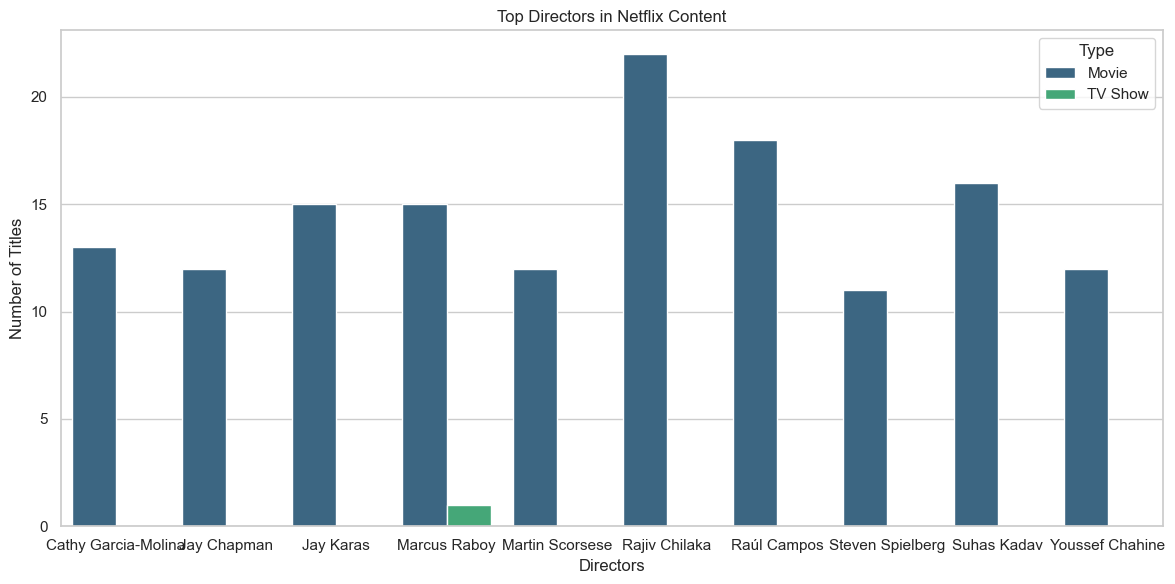

In [20]:
df_director = df.dropna(subset=['director'])
df_director['director'] = df_director['director'].str.split(',').str[0]
top_directors = df_director['director'].value_counts().head(10).index
df_director = df_director[df_director['director'].isin(top_directors)]
df_director = df_director.groupby(['director', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_director,
    x='director',
    y='count',
    hue='type',
    palette='viridis'
)
plt.title("Top Directors in Netflix Content")
plt.xlabel("Directors")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## 🎭 Content Genre Analysis

### 🔟 Top 10 Most Common Genres
I analyzed the `listed_in` column to identify the top 10 most frequently appearing genres across Netflix content. These genres highlight the platform’s most dominant content categories based on volume.


In [35]:
genre = df_genre['listed_in'].value_counts().head(10).index
genre = df_genre['listed_in'].value_counts().head(10).index.tolist()

print('---------------\n',"Top 10 Genres:  ",'\n---------------')

i = 0
for g in genre:
    i+=1
    print(i ,'|', g)

---------------
 Top 10 Genres:   
---------------
1 | Action & Adventure
2 | Children & Family Movies
3 | Comedies
4 | Crime TV Shows
5 | Documentaries
6 | Dramas
7 | Horror Movies
8 | International TV Shows
9 | Kids' TV
10 | Stand-Up Comedy


### 📊 Genre Distribution in Movies vs TV Shows
A bar chart was created to show the distribution of top genres separately for Movies and TV Shows. This helps reveal how certain genres (e.g., Drama, Comedy) vary in popularity depending on content type.


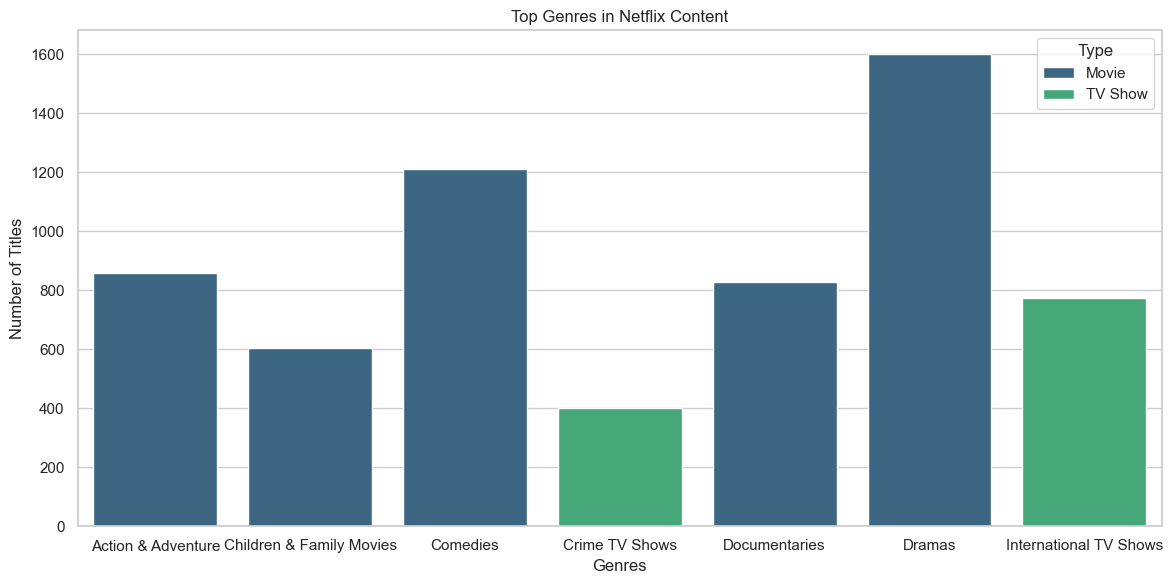

In [40]:
t_genre = df.dropna(subset=['listed_in','type'])
t_genre['listed_in'] = t_genre['listed_in'].str.split(',').str[0]
top_genres = t_genre['listed_in'].value_counts().head(7).index
t_genre = t_genre[t_genre['listed_in'].isin(top_genres)]
t_genre = t_genre.groupby(['listed_in', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=t_genre,
    x='listed_in',
    y='count',
    hue='type',
    palette='viridis'
)
plt.title("Top Genres in Netflix Content")
plt.xlabel("Genres")
plt.ylabel("Number of Titles")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### 📈 Genre Trends Over the Years
I have tracked the popularity of the top 5 genres across the most recent 5 years using a line plot. This temporal trend shows which genres are gaining traction and which are declining over time.


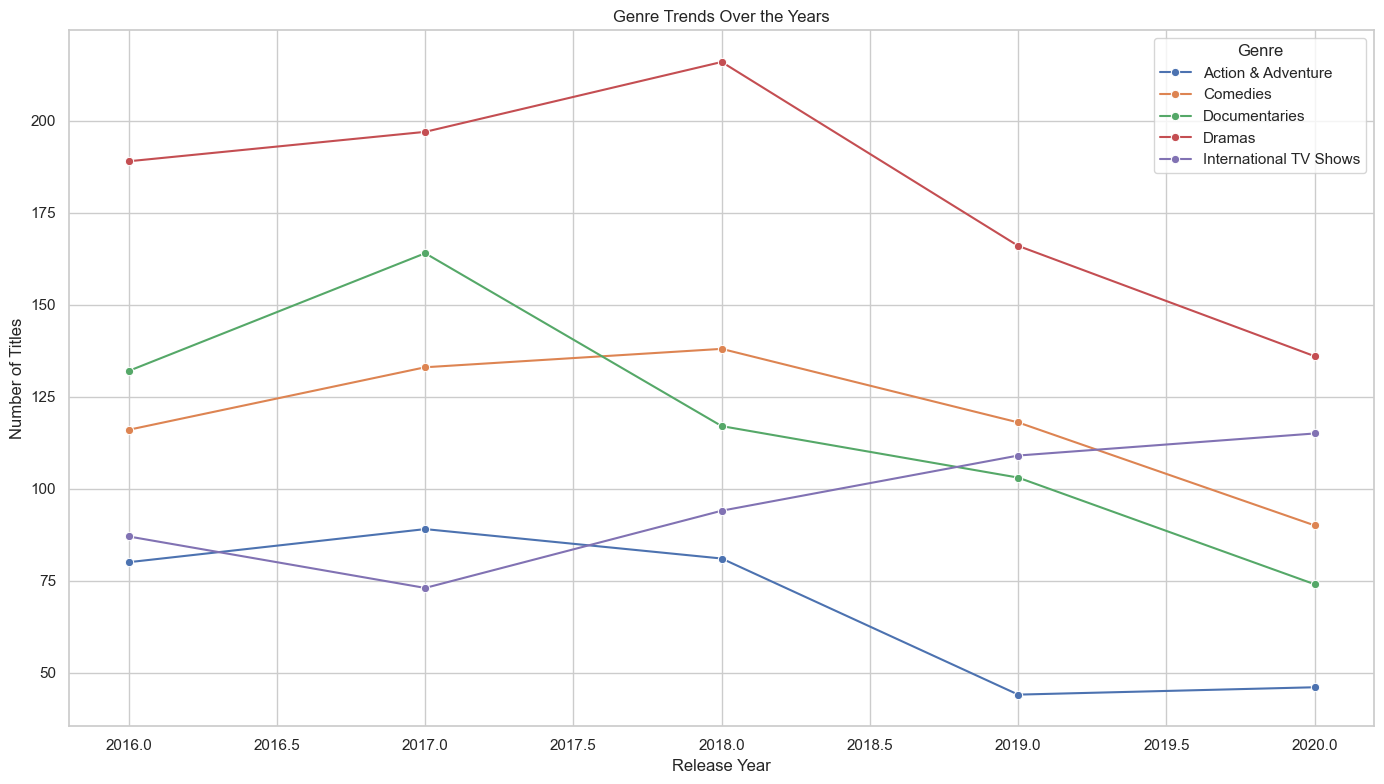

In [50]:
genre_trend = df.dropna(subset=['listed_in', 'release_year'])
genre_trend['listed_in'] = genre_trend['listed_in'].str.split(',').str[0]
top_genres = genre_trend['listed_in'].value_counts().head(5).index
genre_trend = genre_trend[genre_trend['listed_in'].isin(top_genres)]
last5_years = genre_trend['release_year'].value_counts().sort_values(ascending=False).head(5).index
genre_trend = genre_trend[genre_trend['release_year'].isin(last5_years)]
genre_trend = genre_trend.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=genre_trend,
    x='release_year',
    y='count',
    hue='listed_in',
    marker='o'
)
plt.title("Genre Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()


> ✅ Completed: Genre Identification, Type-wise Comparison, and Yearly Trend Analysis

## 📌 Project Summary: Netflix Movies & TV Shows Analysis

This exploratory data analysis (EDA) project dives deep into Netflix's global content catalog to uncover hidden insights about trends, patterns, and content diversity. The key areas explored include:

---

### 🔍 **Descriptive Analysis**
- Overview of content types (Movies vs TV Shows)
- Null value and duplicate handling
- Release year distribution and title trends

---

### ⏳ **Time-Based Analysis**
- Content added over the years and by months
- Seasonality trends in content uploads
- Yearly comparison of Movies vs TV Shows

---

### 🌎 **Geographic Analysis**
- Top 10 countries producing Netflix content
- Type-wise distribution (Movie/TV) by country
- Heatmap of genre preferences by country

---

### 👥 **People-Centric Analysis**
- Top directors and most frequent actors/actresses
- Most collaborative cast members
- Type-wise distribution of director/actor contributions

---

### 🎭 **Genre Analysis**
- Top genres across all content
- Genre-wise comparison between Movies and TV Shows
- Yearly genre trends for the past 5 years

---

### 🧠 **Insights & Learnings**
- Netflix content is heavily dominated by Movies
- The USA leads in content production, followed by India and the UK
- Drama, Comedy, and Documentaries are the most consistent genres
- Notable names like Rajiv Chilaka and Anupam Kher appear frequently in the dataset

---

📁 **Tools Used**: Python, Pandas, Matplotlib, Seaborn  
📊 **Skills Applied**: Data cleaning, grouping, aggregation, visualization, trend analysis

> ✅ **Project Status**: Completed  
> 🚀 **Next Steps** *(Optional)*: Extend to recommendation systems, sentiment analysis of descriptions, or integration with IMDb/Rotten Tomatoes data.

---
